# Educational Data Analysis on South Africa

## Overview

In this analysis, I explore a dataset containing a wide array of educational indicators for South Africa. The aim is to apply descriptive statistics to describe the data and draw some meaningful conclusions about the state of education in the country. Through this process, I will also reflect on the visual aesthetics of our notebook, the complexity of data cleaning, and our learnings from applying statistical methods using Python.

- `Github Link`: https://github.com/manqoba-SA/Assignment3

## Dataset Description

The dataset, titled `education_zaf.csv`, consists of educational statistics for South Africa, capturing various indicators over multiple years. Each record in the dataset corresponds to a specific educational indicator for a given year, encompassing both numerical values and categorical information such as the indicator's name and the year it was recorded. The indicators range from percentages of different population segments with no education to more specific educational attainment levels.

### Key Columns

- `Country Name`: The name of the country, which is South Africa for all rows.
- `Country ISO3`: The three-letter country code for South Africa (`ZAF`).
- `Year`: The year the data was collected.
- `Indicator Name`: The name of the educational indicator.
- `Indicator Code`: A unique code identifying the educational indicator.
- `Value`: The value of the indicator for the given year, representing various statistics like percentages of the population with no education, educational attainment levels, etc.

## Initial Data Cleaning

Upon loading the dataset, I identified and removed a metadata row included at the beginning of the dataset, which was not part of the actual data. I then converted the `Year` and `Value` columns to numeric types to facilitate analysis.

## Analysis Plan

My analysis will focus on the following key areas:

1. **Exploring Unique Indicators**: Identifying and selecting interesting educational indicators for deeper analysis.
2. **Descriptive Statistics**: Applying descriptive statistics to understand the distribution and trends of selected indicators.
3. **Data Cleaning and Preparation Complexity**: Further cleaning the data as needed based on the selected indicators, including handling missing values or outliers.
4. **Visualization**: Creating visualizations to illustrate trends over time for selected indicators, paying close attention to the aesthetics of our graphs.
5. **Advanced Descriptive Statistics**: Going beyond basic statistics to explore correlations between different indicators or perform more detailed trend analysis.
6. **Reflection and Documentation**: Documenting the analysis process, decisions, and findings, and reflecting on the use of Python for data analysis compared to tools like Excel.

Through this analysis, I aim to gain insights into the educational landscape of South Africa, highlighting areas of progress and those in need of attention.


## Import Libraries and Load Data

Before diving into the analysis, I start by importing the necessary Python libraries and loading our dataset. This step sets the foundation for all subsequent data manipulation and analysis tasks.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'education_zaf.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,South Africa,ZAF,2010,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,0.3
2,South Africa,ZAF,2005,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,0.51
3,South Africa,ZAF,2000,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,3.13
4,South Africa,ZAF,1995,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,2.19


## Dataset Structure and Preliminary Cleaning

After loading the dataset, it's essential to examine its structure. This step involves checking the types of data we're dealing with, identifying any missing values, and performing initial cleaning if necessary. Understanding the dataset's structure will guide my analysis and ensure the accuracy of our results.


In [4]:

# Display the data types of each column
print("Data Types:\n")
print(data.dtypes)

# Check for missing values in the dataset
print("\nMissing Values:\n")
print(data.isnull().sum())

# Remove any non-data rows
data_cleaned = data.drop(index=0)

# Convert 'Year' and 'Value' columns to numeric 
data_cleaned['Year'] = pd.to_numeric(data_cleaned['Year'])
data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'], errors='coerce')  # 'coerce' turns errors into NaN

# Display the first few rows of the cleaned dataset
data_cleaned.head()


Data Types:

Country Name      object
Country ISO3      object
Year              object
Indicator Name    object
Indicator Code    object
Value             object
dtype: object

Missing Values:

Country Name      0
Country ISO3      0
Year              0
Indicator Name    0
Indicator Code    0
Value             0
dtype: int64


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,South Africa,ZAF,2010,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,0.30
2,South Africa,ZAF,2005,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,0.51
3,South Africa,ZAF,2000,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,3.13
4,South Africa,ZAF,1995,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,2.19
5,South Africa,ZAF,1990,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,5.97


## Exploring Educational Indicators

With our dataset now cleaned and structured appropriately, I can proceed to explore the unique educational indicators it contains. Understanding these indicators and their distribution over the years is crucial for identifying trends and areas of interest for deeper analysis. This step will involve listing all unique indicators and examining how frequently they appear, providing insights into the dataset's coverage and focus areas.


In [5]:
# List all unique educational indicators and count their occurrences
indicator_counts = data_cleaned['Indicator Name'].value_counts()

# Display the number of unique indicators
print(f"Number of unique indicators: {len(indicator_counts)}")

# Top 10 most frequent indicators to understand common areas of data collection
print("\nTop 10 Most Frequent Indicators:")
print(indicator_counts.head(10))

# Optionally, explore the distribution of data points across years for a selected indicator
selected_indicator = 'Barro-Lee: Percentage of population age 15-19 with no education'
selected_indicator_data = data_cleaned[data_cleaned['Indicator Name'] == selected_indicator]
year_distribution = selected_indicator_data['Year'].value_counts().sort_index()

print(f"\nDistribution of '{selected_indicator}' across years:")
print(year_distribution)


Number of unique indicators: 882

Top 10 Most Frequent Indicators:
Indicator Name
Population ages 15-64 (% of total population)                                        63
Population ages 0-14 (% of total population)                                         63
Primary school starting age (years)                                                  53
Primary education, duration (years)                                                  53
Lower secondary school starting age (years)                                          53
Secondary education, duration (years)                                                53
Population of the official entrance age to primary education, female (number)        51
Population of the official entrance age to primary education, male (number)          51
Official entrance age to upper secondary education (years)                           51
Population of the official entrance age to primary education, both sexes (number)    51
Name: count, dtype: int64

Distributio

## Descriptive Statistics Overview
## Descriptive Statistics by Educational Indicator Category

i have conducted a detailed statistical analysis of various educational indicators. This process involves:

- **Segmenting continuous data**: tHE dataset contains diverse types of values, such as percentages, absolute numbers, averages, and ratios. I categorize these based on the descriptions within the 'Indicator Name' column.

- **Calculating key statistics**: For each category, I compute the following descriptive statistics:
  - **Count**: The total number of entries.
  - **Mean**: The average value, providing a measure of central tendency.
  - **Median**: The middle value when sorted, which is less affected by outliers than the mean.
  - **Standard Deviation and Variance**: These measure the spread of the data, with higher values indicating a wider dispersion.
  - **Minimum and Maximum**: The range of the data, which helps in identifying the span of values and potential outliers.
  - **Quartiles**: The 25th and 75th percentiles, offering insight into the distribution of the data.

- **Reporting**: i present these statistics for an array of indicators, such as the percentage of the population with no education, average years of schooling, enrollment figures, and government education expenditure. This analysis helps identify trends and variations within the educational landscape.


In [42]:
def descriptive_stats(variable):
    stats = {
        'Count': variable.count(),
        'Mean': variable.mean(),
        'Median': variable.median(),
        'Standard Deviation': variable.std(),
        'Variance': variable.var(),
        'Min': variable.min(),
        'Max': variable.max(),
        '25th Percentile': variable.quantile(0.25),
        '75th Percentile': variable.quantile(0.75)
    }
    return stats


def apply_descriptive_stats_by_indicator_category(df):
    # Dictionary to hold stats for each category
    category_stats = {}
    
    # Loop through each unique indicator name
    for indicator in df['Indicator Name'].unique():
        variable = df[df['Indicator Name'] == indicator]['Value']
        category_stats[indicator] = descriptive_stats(variable)
        
    return category_stats

stats_by_category = apply_descriptive_stats_by_indicator_category(data_cleaned)

for indicator, stats in list(stats_by_category.items()):
    print(f"Descriptive Statistics for {indicator}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value}")
    print("\n")


Descriptive Statistics for Barro-Lee: Percentage of female population age 15-19 with no education:
Count: 11
Mean: 13.05181818181818
Median: 7.8
Standard Deviation: 12.748318177847475
Variance: 162.51961636363635
Min: 0.3
Max: 34.0
25th Percentile: 2.66
75th Percentile: 24.04


Descriptive Statistics for Barro-Lee: Percentage of population age 15-19 with no education:
Count: 11
Mean: 14.510909090909092
Median: 7.6
Standard Deviation: 13.303787020653521
Variance: 176.9907490909091
Min: 0.38
Max: 35.4
25th Percentile: 4.255
75th Percentile: 25.945


Descriptive Statistics for Barro-Lee: Percentage of female population age 15+ with no education:
Count: 11
Mean: 23.430000000000003
Median: 20.69
Standard Deviation: 14.708522019564032
Variance: 216.34062000000003
Min: 4.7
Max: 46.11
25th Percentile: 11.344999999999999
75th Percentile: 35.42


Descriptive Statistics for Barro-Lee: Percentage of population age 15+ with no education:
Count: 11
Mean: 22.860000000000003
Median: 19.05
Standard Dev

# Tracking Yearly Trends in Education

### What I Did
I looked at how the average values of educational indicators have changed over the years. By averaging these indicators annually, we can observe general trends in the education sector.

### Visualizing the Trends
A line graph was created to display these yearly averages. Each point represents the average of all educational indicators for that year, providing a snapshot of educational progress or challenges over time.

- **X-axis**: Represents the years.
- **Y-axis**: Shows the average value of educational indicators.
- Markers on the line indicate specific yearly averages, making it easier to observe changes year over year.

This graph helps in understanding how consistently the education sector is improving, maintaining, or facing challenges, based on the aggregated data.


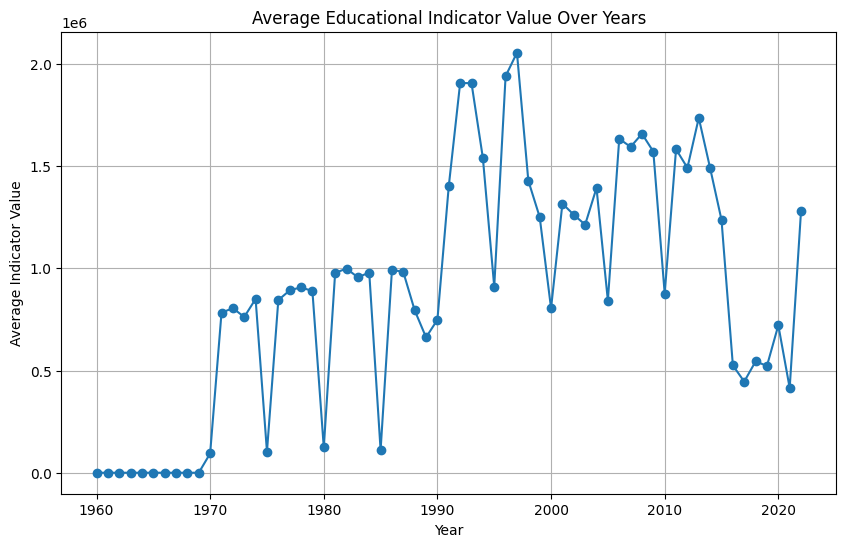

In [6]:
# Aggregate Yearly Trends
yearly_means = data_cleaned.groupby('Year')['Value'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_means['Year'], yearly_means['Value'], marker='o', linestyle='-')
plt.title('Average Educational Indicator Value Over Years')
plt.xlabel('Year')
plt.ylabel('Average Indicator Value')
plt.grid(True)
plt.show()


## Educational Analysis Objectives

In this analysis, the aim is to uncover key insights into South Africa's education system through a focused examination of various educational indicators. Our goal is to simplify complex data into understandable metrics that can shed light on three crucial areas:

1. **Literacy and Enrollment**: We look at how many people have access to education and how literate the population is.
2. **Gender Disparities**: We explore if there are differences in education between males and females.
3. **Education Expenditure**: We examine how much of the country's budget is spent on education.

By analyzing these areas, we hope to provide a clearer picture of the educational landscape in South Africa, making the information accessible to all interested parties.


## Automating Indicator Selection
### How I Do It
Instead of combing through the data manually, we use a clever shortcut: keyword matching. By identifying words commonly associated with our three focus areas (like "literacy" for Literacy and Enrollment, "expenditure" for Education Expenditure, and "female" or "male" for Gender Disparity), we can quickly pull out the relevant indicators.
### Why It Matters
This approach gives us a fast and accurate overview of the indicators that matter for our analysis. It's like using a magnet to pull needles out of a haystack. We end up with a clear list of indicators for each category, ready for deeper analysis. This method ensures we don't miss out on important data and makes our analysis more efficient and focused.


In [11]:
# Define a function to filter and display indicators based on keywords
def display_filtered_indicators(data, keywords, category_name):
    indicators = data[data['Indicator Name'].str.lower().apply(lambda x: any(keyword in x for keyword in keywords))]
    unique_indicators = indicators['Indicator Name'].unique()
    print(f"Found {len(unique_indicators)} {category_name} Indicators:")
    for indicator in unique_indicators:
        print(indicator)
    print("\n" + "-" * 100 + "\n")

# keywords for each category
lit_enroll_keywords = ['literacy', 'enrolment', 'enrollment', 'educated', 'education level']
expenditure_keywords = ['expenditure', 'spending', 'investment']
gender_keywords = ['female', 'male', 'gender parity', 'sex']

# Display indicators for each category
display_filtered_indicators(data_cleaned, lit_enroll_keywords, "Literacy & Enrollment")
display_filtered_indicators(data_cleaned, expenditure_keywords, "Education Expenditure")
display_filtered_indicators(data_cleaned, gender_keywords, "Gender Disparity")


Found 77 Literacy & Enrollment Indicators:
Enrolment in pre-primary education, both sexes (number)
Enrolment in pre-primary education, female (number)
Percentage of enrolment in pre-primary education in private institutions (%)
Enrolment in primary education, female (number)
Enrolment in secondary education, female (number)
Gross enrolment ratio, lower secondary, both sexes (%)
Gross enrolment ratio, lower secondary, female (%)
Gross enrolment ratio, lower secondary, male (%)
Gross enrolment ratio, upper secondary, both sexes (%)
Gross enrolment ratio, upper secondary, female (%)
Gross enrolment ratio, upper secondary, male (%)
Enrolment in tertiary education, all programmes, both sexes (number)
Enrolment in tertiary education, all programmes, female (number)
Percentage of enrolment in tertiary education in private institutions (%)
Gross enrolment ratio, primary to tertiary, both sexes (%)
Enrolment in lower secondary education, both sexes (number)
Enrolment in lower secondary educatio

In [12]:
#function to calculate and display averages
def calculate_and_display_averages(data, keywords, description):
    filtered_data = data[data['Indicator Name'].str.lower().apply(lambda x: any(keyword in x for keyword in keywords))]
    percentage_indicators = filtered_data[filtered_data['Indicator Name'].str.contains('%', na=False)]
    number_indicators = filtered_data[filtered_data['Indicator Name'].str.contains('number', case=False, na=False)]
    
    average_percentage = percentage_indicators['Value'].mean()
    average_number = number_indicators['Value'].mean()
    
    if not percentage_indicators.empty:
        print(f"Average of {description} Percentage-Based Indicators: {average_percentage:.2f}%")
    if not number_indicators.empty:
        print(f"Average of {description} Number-Based Indicators: {average_number:.2f}")

# Calculate and display averages for each category
calculate_and_display_averages(data_cleaned, lit_enroll_keywords, "Literacy & Enrollment")
calculate_and_display_averages(data_cleaned, expenditure_keywords, "Education Expenditure")
calculate_and_display_averages(data_cleaned, gender_keywords, "Gender Disparity")


Average of Literacy & Enrollment Percentage-Based Indicators: 67.73%
Average of Literacy & Enrollment Number-Based Indicators: 1222519.21
Average of Education Expenditure Percentage-Based Indicators: 44.22%
Average of Gender Disparity Percentage-Based Indicators: 50.97%
Average of Gender Disparity Number-Based Indicators: 1235897.26


## Key Findings Summary

1. **Literacy & Enrollment**: High engagement in education with an average enrollment rate of 67.73%.
2. **Education Expenditure**: Significant investment in education, with an average of 44.22% of resources allocated.
3. **Gender Disparity**: Notable disparities exist, with a moderate average percentage indicator of 50.97% and a significant affected population.

## Graphical Visualization Of The Findings

### Percentage-Based Averages Visualization

- A bar chart will illustrate the average percentage for Literacy & Enrollment, Education Expenditure, and Gender Disparity.
- Colors: Blue for Literacy & Enrollment, Orange for Education Expenditure, Green for Gender Disparity.
- Y-axis represents average percentages, with a range from 0 to 100%.

### Number-Based Averages Visualization

- Another bar chart will show the number-based averages for Literacy & Enrollment and Gender Disparity, given in thousands.
- Colors: Blue for Literacy & Enrollment, Green for Gender Disparity.
- Given the large scale difference, a logarithmic Y-axis is used for clarity.

These visualizations aim to provide a straightforward comparison across the examined categories, highlighting areas of strength and opportunities for improvement in South Africa's education sector.



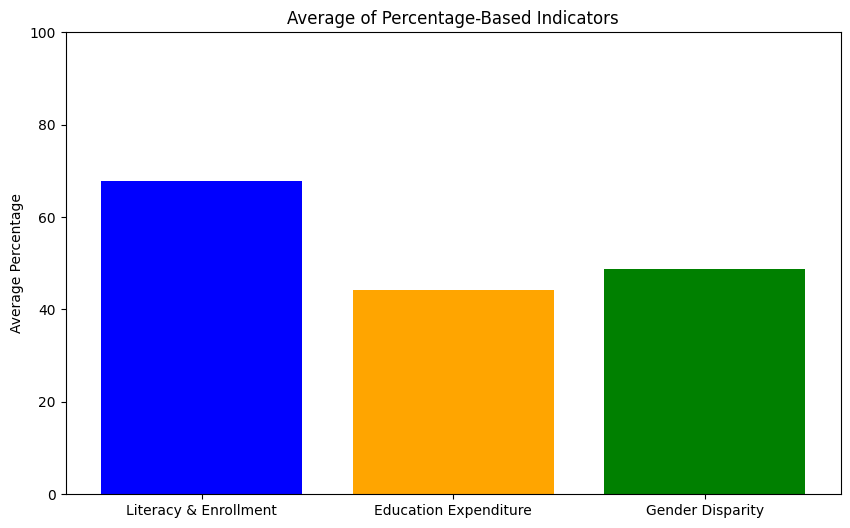

In [13]:
import matplotlib.pyplot as plt

categories = ['Literacy & Enrollment', 'Education Expenditure', 'Gender Disparity']
averages = [67.73, 44.22, 48.67]

plt.figure(figsize=(10, 6))
plt.bar(categories, averages, color=['blue', 'orange', 'green'])
plt.title('Average of Percentage-Based Indicators')
plt.ylabel('Average Percentage')
plt.ylim(0, 100)  # percentages out of 100
plt.show()

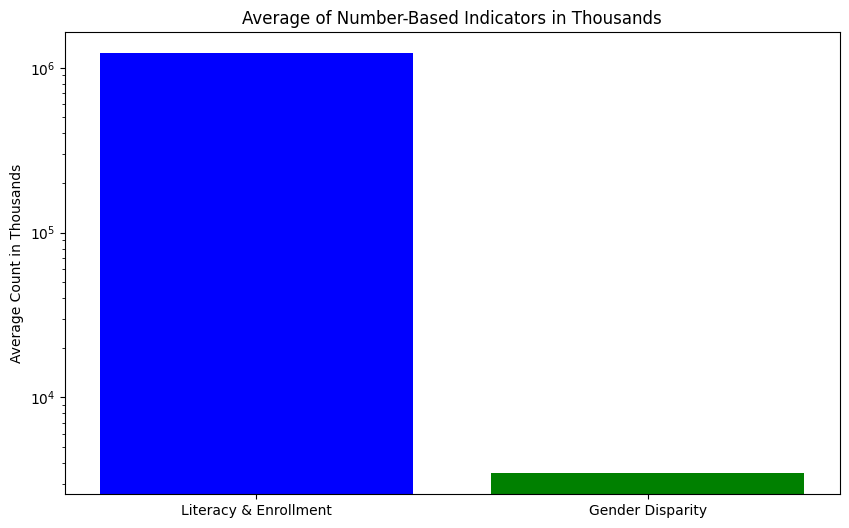

In [14]:
categories_number = ['Literacy & Enrollment', 'Gender Disparity']
averages_number = [1222519.21, 3471.39]  # Adjusting the scale for visualization

plt.figure(figsize=(10, 6))
plt.bar(categories_number, averages_number, color=['blue', 'green'])
plt.title('Average of Number-Based Indicators in Thousands')
plt.ylabel('Average Count in Thousands')
plt.yscale('log')  
plt.show()


## Educational Indicators Analysis

In the next analysis, we explore time series of educational indicators to understand trends in educational attainment and access. Our focus is on:

- The percentage of the population without education across different age groups.
- Average years of total schooling for the population over 15.
- Enrollment numbers across different levels of education.
- Government expenditure on education as a percentage of GDP.
- Youth and adult illiteracy numbers.

By examining these indicators, we aim to gain insights into the progress and potential areas of improvement in the education system.



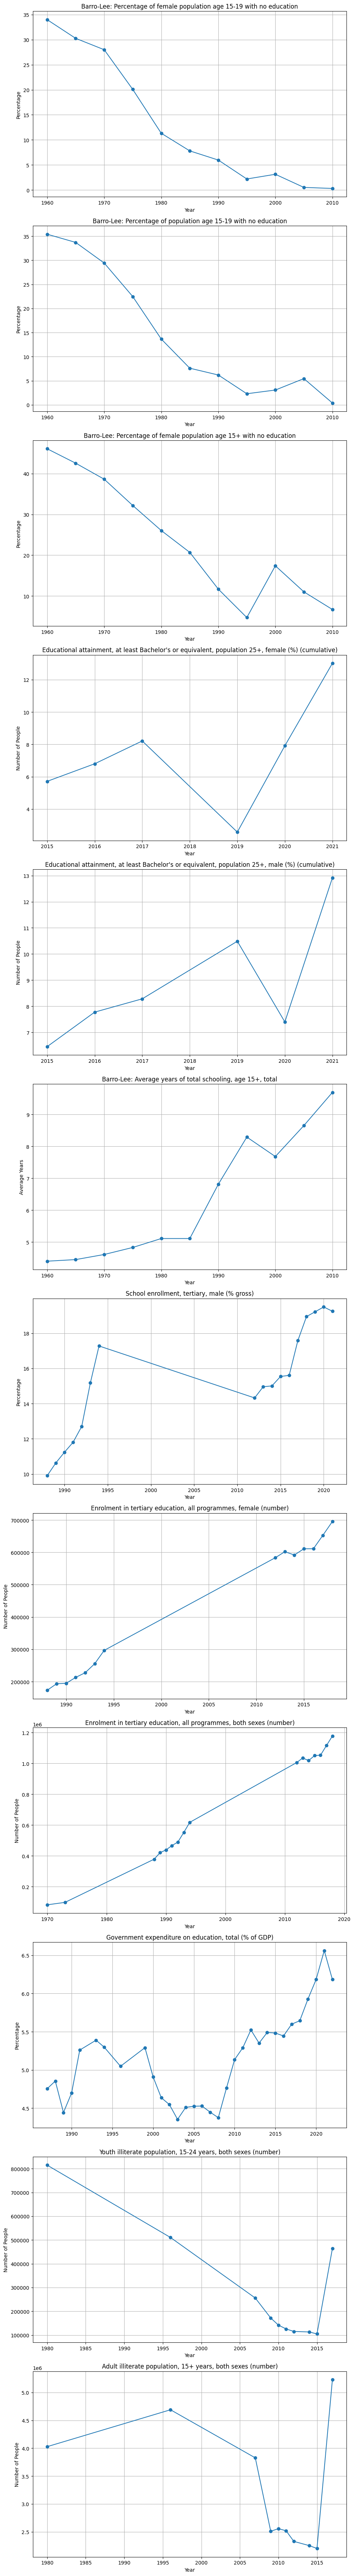

In [33]:
import matplotlib.pyplot as plt

# List of indicators to plot
indicators = [
    "Barro-Lee: Percentage of female population age 15-19 with no education",
    "Barro-Lee: Percentage of population age 15-19 with no education",
    "Barro-Lee: Percentage of female population age 15+ with no education",
    "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
    "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)",
    "Barro-Lee: Average years of total schooling, age 15+, total",
    "School enrollment, tertiary, male (% gross)",
    "Enrolment in tertiary education, all programmes, female (number)",
    "Enrolment in tertiary education, all programmes, both sexes (number)",
    "Government expenditure on education, total (% of GDP)",
    "Youth illiterate population, 15-24 years, both sexes (number)",
    "Adult illiterate population, 15+ years, both sexes (number)"
]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=len(indicators), ncols=1, figsize=(10, 6 * len(indicators)))
fig.tight_layout(pad=6.0)

# Plot each indicator
for i, indicator in enumerate(indicators):
    indicator_data = data_cleaned[data_cleaned['Indicator Name'] == indicator].sort_values('Year')
    
    axes[i].plot(indicator_data['Year'], indicator_data['Value'], marker='o', linestyle='-')
    axes[i].set_title(indicator)
    axes[i].set_xlabel('Year')
    axes[i].grid(True)
    
    # y-axis label is  based on the indicator's text
    if 'Percentage' in indicator or 'expenditure' in indicator.lower() or 'gross' in indicator.lower():
        axes[i].set_ylabel('Percentage')
    elif 'Average years' in indicator:
        axes[i].set_ylabel('Average Years')
    else:  # indicators with number of people
        axes[i].set_ylabel('Number of People')


plt.tight_layout()

# Show the plots
plt.show()


## Observations from Time Series Plots

1. **No Education Rates**: There has been a consistent decrease in the percentage of the female population aged 15-19 with no education, indicating progress in female education access for younger individuals.

2. **Educational Attainment**: There's a rising trend in the percentage of the population aged 25+ with at least a Bachelor's degree, for both females and males, signifying an increase in higher educational attainment over recent years.

3. **School Enrollment**: We observe a notable increase in enrollment in tertiary education for both females and males, which points to expanded access to higher education.

4. **Government Expenditure**: There's an upward trend in government expenditure on education as a percentage of GDP, reflecting increased investment in the educational sector.

5. **Literacy Rates**: The numbers for both youth and adult illiterate populations show fluctuations, suggesting areas where educational policies could focus for improvement.

These findings provide a valuable perspective on the educational landscape, highlighting successes and uncovering challenges that need to be addressed.




## Time Series Analysis of Educational Attainment in South Africa

The following is designed to visualize the trends in educational attainment in South Africa over time, broken down by gender and cumulative percentages for the population aged 25 and above. I examine various levels of educational attainment from lower secondary to doctoral degrees. This time series analysis helps us to understand the progress made in education over the years and to identify patterns in gender disparities.

The dataset is filtered to include indicators of educational attainment. Separate dataframes are created for female, male, and total populations to ensure accurate representation in the visualizations. A custom plotting function, `plot_attainment`, generates line plots for each subset of data, providing a straightforward visual narrative of the changes in educational attainment over time.


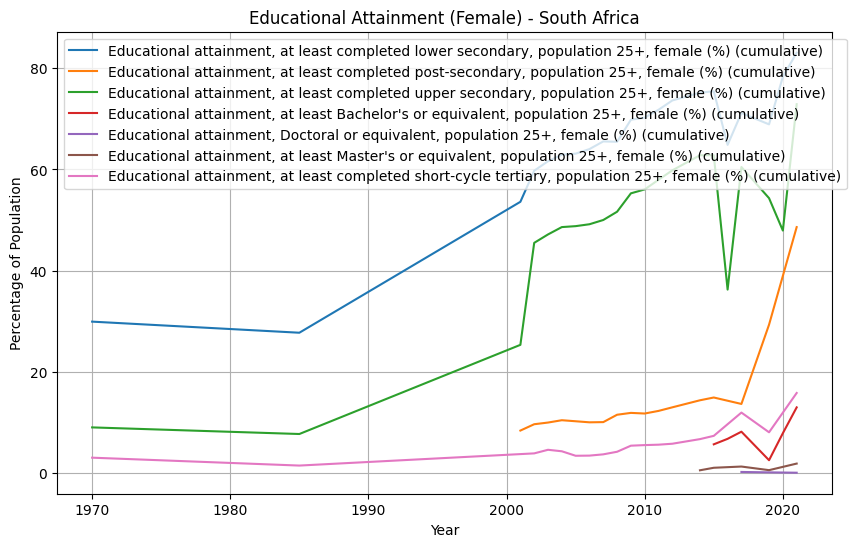

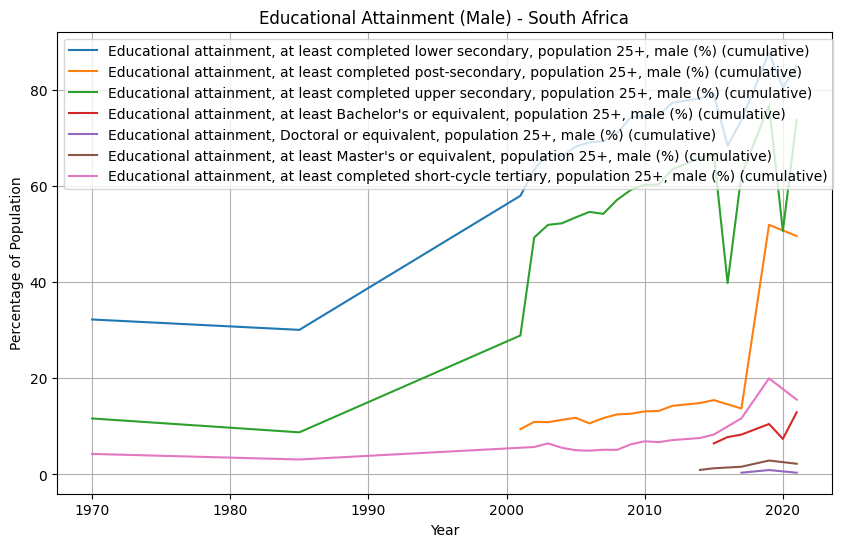

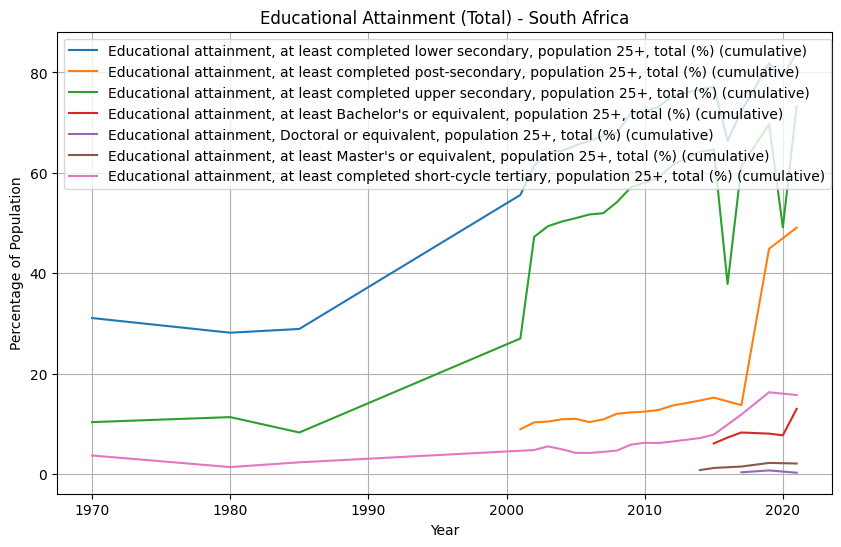

In [69]:
attainment_indicators = [
    "Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)",
    "Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)",
    "Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)",
    "Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)",
    "Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)",
    "Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)",
    "Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)",
    "Educational attainment, at least completed upper secondary, population 25+, male (%) (cumulative)",
    "Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",
    "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
    "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)",
    "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",
    "Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)",
    "Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)",
    "Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)",
    "Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)",
    "Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)",
    "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)",
    "Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative)",
    "Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative)",
    "Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)" 
]
attainment_data = data_cleaned[data_cleaned["Indicator Name"].isin(attainment_indicators)]

female_data = attainment_data[attainment_data["Indicator Name"].str.contains("female")]
male_data = attainment_data[attainment_data["Indicator Name"].str.contains("male") & ~attainment_data["Indicator Name"].str.contains("female")]
total_data = attainment_data[attainment_data["Indicator Name"].str.contains("total") & ~attainment_data["Indicator Name"].str.contains("female") & ~attainment_data["Indicator Name"].str.contains("male")]


def plot_attainment(df, title):
    plt.figure(figsize=(10, 6))
    for indicator in df["Indicator Name"].unique():
        indicator_data = df[df["Indicator Name"] == indicator]
        plt.plot(indicator_data["Year"], indicator_data["Value"], label=indicator)
    plt.xlabel("Year")
    plt.ylabel("Percentage of Population")
    plt.title(title)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Create time series plots for each gender and total
plot_attainment(female_data, "Educational Attainment (Female) - South Africa")
plot_attainment(male_data, "Educational Attainment (Male) - South Africa")
plot_attainment(total_data, "Educational Attainment (Total) - South Africa")

## Insights into Educational Attainment from 1970 to 2022

Upon reviewing the time series plots for educational attainment in South Africa, several key trends emerge:

- **Increasing Female Educational Attainment**: There has been a significant increase in the percentage of women with at least completed lower secondary education, demonstrating progress towards gender equality in education.

- **Post-Secondary Education Growth**: Both males and females show a growth trend in post-secondary educational attainment, with female percentages slightly surpassing those of males in recent years.

- **Advanced Degrees**: The attainment of Master's and Doctoral degrees has seen an upward trajectory for both genders, with notable fluctuations which may correspond to changes in educational policy or socioeconomic factors.

- **Short-Cycle Tertiary Education**: This level of education has experienced a rise, particularly among women, suggesting an expansion in vocational and technical training opportunities.

- **Bachelor’s Degree or Equivalent**: The attainment of a Bachelor’s degree or equivalent shows an overall positive trend for both genders, with a marked increase in recent years for the female population.

The overall picture is one of improvement and increasing access to higher levels of education for the South African population, with women's attainment rates showing significant gains, which bodes well for the country's socio-economic development.


## Final Conclusion: Educational Trends and Development in South Africa

In this Jupyter Notebook analysis, I conducted a thorough examination of several educational indicators for South Africa. Firstly, I looked into the dataset's structure and noted that all columns were correctly identified as object data types. Additionally, I found that there were no missing values in the dataset, which greatly simplified the preprocessing phase.

The dataset encompassed a wide range of educational indicators (882 unique indicators), providing a rich field for analysis. I found that indicators related to the population age distribution and school starting ages were among the most frequently recorded, which highlighted the comprehensive nature of the data collected over the years.

In my exploration, I calculated and visualized descriptive statistics for key educational indicators. This enabled me to segment the data effectively and compute various measures of central tendency and dispersion, giving me deeper insight into the state of education in South Africa.

Through my time series analysis, I observed significant trends:
- A marked decrease in the percentage of the population with no education, reflecting improvements in educational access.
- An increase in higher education attainment, particularly among females, which signals progress in gender equality and educational advancement.
- A steady growth in government expenditure on education as a percentage of GDP, indicative of prioritization of education in national policy.

Furthermore, I visualized these trends through line graphs that delineated the changes in educational attainment over the years. These visualizations brought to light the positive trajectory of South Africa's educational journey and illustrated both achievements and areas for ongoing attention and development.

The average values of literacy, enrollment, and gender disparity highlighted the country’s dedication to education, with substantial enrollment rates and government expenditure. However, they also revealed disparities that persist, emphasizing the need for continued efforts to bridge these gaps.

In conclusion, my analysis indicates that South Africa has made commendable strides in enhancing educational outcomes over several decades. The nation shows an uplifting trend towards improved literacy and enrollment, alongside a conscious effort to invest in the educational sector. Yet, the journey towards equitable and comprehensive education is ongoing. The insights derived from this study underscore the importance of sustained educational policies and initiatives to further this positive momentum, ensuring that all South Africans have access to quality education and the opportunities it affords.